## This notebook compares the labels and predictions from the Python hdbscan module to the Tribuo HDBSCAN* java prototype

In [16]:
import numpy as np
import pandas as pd
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import normalized_mutual_info_score
import hdbscan
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

In [17]:
# same as /Users/gstewart/temp/development/mscs/cpsc69700/RefImpl/HDBSCAN_Star/basic-gaussians.csv but with headers
df = pd.read_csv('../../../data/basic-gaussians.csv')

In [18]:
print(df.shape)

(2000, 3)


In [19]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=7).fit(df)

In [20]:
# print(clusterer.labels_)

In [21]:
hdbscan_label_list = clusterer.labels_.tolist()
print(len(hdbscan_label_list))

2000


In [22]:
print(set(hdbscan_label_list))

{0, 1, 2, -1}


In [25]:
cluster_colors = []
for i, label in enumerate(hdbscan_label_list):
    if label == -1:
        cluster_colors.append('black')
    elif label == 0:
        cluster_colors.append('lightskyblue')
    elif label == 1:
        cluster_colors.append('lightgreen')
    else:
        cluster_colors.append('plum')

# plt.savefig('/data/src/other/gsc/mscs/cpsc69700/thesis/figure3.png')

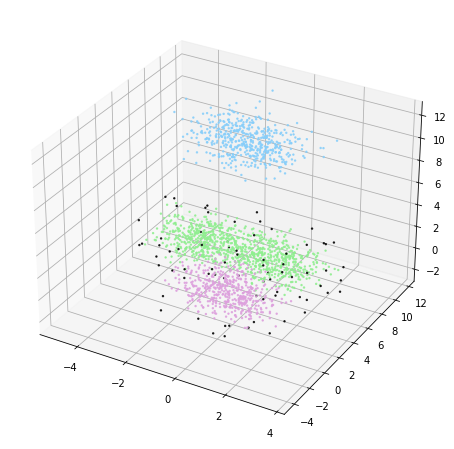

In [27]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(df.Feature1, df.Feature2, df.Feature3, alpha = 0.8, s = 2, c = cluster_colors)
# plt.savefig('/data/src/other/gsc/mscs/cpsc69700/thesis/figure3.png')

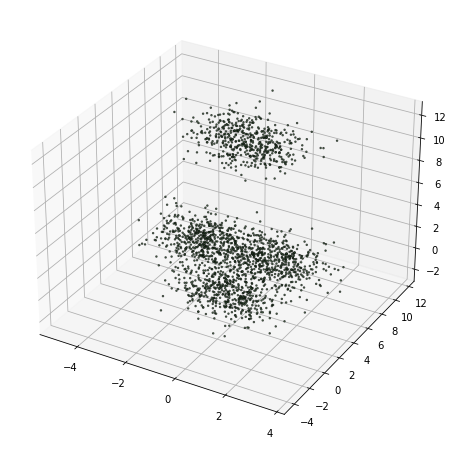

In [15]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Feature1, df.Feature2, df.Feature3,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 2)
plt.show()

In [7]:
# check the mutual information between results
def evaluate(result1, result2):
    print('Result Evaluation')
    print('Normalized MI = %.2f' % normalized_mutual_info_score(result1, result2))
    print('Adjusted MI = %.2f' % adjusted_mutual_info_score(result1, result2))

In [8]:
# these are the cluster assignments from the gaussians - declared in notebook: data setup scikit-learn gaussians Tribuo Unit Tests
actual_cluster_labels = [2, 3, 1, 3, 0, 2, 1, 1, 0, 2, 1, 0, 3, 0, 2, 0, 1, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 1, 0, 2, 2, 1, 3, 2, 3, 0, 2, 0, 1, 2, 0, 0, 3, 2, 2, 2, 2, 2, 2, 3, 0, 1, 3, 1, 3, 2, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 0, 3, 2, 2, 1, 0, 2, 0, 3, 2, 0, 0, 3, 1, 2, 1, 0, 0, 2, 2, 1, 3, 1, 1, 0, 3, 2, 2, 3, 3, 1, 1, 0, 1, 3, 3, 1, 3, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 3, 1, 3, 2, 2, 0, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 1, 1, 3, 1, 1, 0, 2, 0, 2, 1, 3, 2, 0, 3, 2, 3, 0, 2, 1, 1, 1, 2, 2, 1, 1, 3, 0, 0, 3, 2, 0, 2, 3, 0, 2, 0, 2, 0, 3, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 3, 1, 0, 3, 3, 2, 3, 0, 2, 1, 1, 1, 0, 1, 2, 3, 0, 0, 1, 0, 1, 3, 0, 2, 0, 1, 3, 3, 0, 1, 2, 2, 2, 0, 0, 3, 3, 2, 0, 1, 3, 1, 2, 0, 1, 0, 3, 0, 2, 2, 3, 2, 2, 1, 2, 0, 3, 1, 1, 3, 3, 0, 3, 3, 3, 2, 2, 0, 1, 2, 0, 2, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 2, 3, 0, 1, 1, 1, 1, 1, 1, 3, 3, 2, 3, 0, 2, 3, 1, 3, 3, 0, 1, 1, 1, 2, 1, 2, 3, 2, 3, 2, 1, 1, 1, 2, 1, 0, 1, 3, 3, 1, 2, 1, 1, 1, 2, 0, 2, 0, 1, 3, 3, 2, 0, 3, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3, 2, 3, 1, 2, 0, 2, 0, 2, 0, 1, 1, 3, 0, 1, 2, 0, 1, 1, 3, 1, 1, 2, 1, 2, 2, 3, 3, 3, 0, 2, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 2, 3, 2, 3, 0, 3, 2, 1, 3, 2, 3, 1, 3, 3, 3, 3, 0, 1, 3, 2, 1, 2, 2, 3, 0, 3, 1, 0, 1, 0, 3, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 3, 1, 2, 2, 3, 2, 1, 3, 0, 3, 3, 2, 1, 2, 2, 1, 3, 3, 0, 2, 0, 0, 3, 3, 2, 3, 3, 2, 0, 0, 0, 0, 3, 1, 1, 0, 1, 3, 0, 3, 3, 3, 2, 2, 2, 3, 2, 0, 0, 2, 3, 3, 1, 3, 3, 0, 3, 3, 3, 0, 2, 3, 3, 0, 1, 2, 3, 1, 1, 1, 3, 3, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 2, 3, 3, 2, 1, 1, 3, 3, 2, 0, 2, 0, 1, 0, 1, 2, 2, 3, 2, 0, 2, 2, 2, 1, 2, 1, 0, 3, 3, 1, 1, 1, 0, 0, 1, 2, 1, 3, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 3, 0, 1, 1, 3, 2, 1, 2, 0, 0, 0, 2, 0, 3, 2, 3, 2, 3, 1, 1, 1, 0, 0, 3, 1, 2, 0, 0, 2, 2, 3, 2, 3, 1, 2, 1, 3, 3, 3, 0, 0, 3, 2, 1, 1, 1, 0, 0, 3, 2, 0, 0, 3, 2, 2, 2, 3, 2, 0, 0, 1, 1, 1, 1, 3, 0, 3, 3, 3, 1, 2, 3, 2, 0, 0, 2, 3, 0, 0, 2, 3, 3, 1, 1, 1, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 0, 1, 2, 2, 3, 3, 0, 0, 2, 3, 3, 3, 1, 0, 1, 3, 3, 2, 2, 1, 3, 2, 1, 0, 3, 0, 0, 0, 3, 3, 3, 3, 2, 0, 1, 0, 1, 3, 0, 0, 0, 1, 3, 1, 1, 2, 3, 2, 1, 2, 2, 3, 2, 2, 0, 1, 0, 0, 0, 0, 1, 3, 2, 2, 1, 1, 2, 3, 1, 2, 2, 1, 0, 0, 1, 2, 1, 3, 1, 0, 3, 3, 1, 3, 2, 2, 2, 1, 1, 1, 2, 1, 0, 3, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 0, 1, 3, 0, 1, 0, 1, 0, 2, 2, 3, 3, 0, 1, 0, 2, 1, 2, 0, 1, 3, 0, 0, 0, 0, 0, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1, 3, 0, 0, 2, 0, 3, 3, 1, 3, 1, 3, 0, 0, 0, 0, 3, 3, 0, 2, 2, 3, 2, 1, 3, 2, 1, 1, 0, 2, 3, 3, 2, 0, 2, 3, 3, 0, 0, 2, 1, 2, 2, 3, 2, 1, 1, 2, 3, 1, 3, 0, 1, 1, 2, 1, 3, 3, 1, 0, 2, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 3, 1, 2, 0, 2, 1, 1, 1, 0, 3, 0, 2, 1, 2, 0, 3, 2, 2, 2, 1, 0, 3, 0, 2, 1, 0, 0, 1, 3, 3, 2, 3, 2, 3, 2, 0, 1, 3, 3, 1, 0, 3, 3, 0, 3, 1, 1, 1, 2, 1, 0, 1, 0, 1, 3, 1, 1, 1, 2, 1, 3, 1, 0, 2, 0, 3, 2, 1, 0, 0, 3, 0, 1, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 3, 2, 1, 0, 3, 3, 0, 0, 1, 0, 3, 0, 2, 1, 0, 2, 2, 3, 3, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 3, 2, 1, 0, 0, 1, 0, 2, 2, 2, 0, 3, 2, 1, 2, 0, 1, 0, 3, 3, 2, 3, 2, 0, 3, 3, 3, 0, 3, 1, 2, 0, 2, 2, 1, 3, 3, 1, 1, 2, 3, 1, 0, 1, 3, 0, 0, 3, 3, 2, 2, 0, 0, 2, 0, 1, 3, 0, 3, 3, 2, 0, 0, 2, 0, 1, 1, 0, 2, 3, 1, 2, 1, 0, 2, 3, 0, 1, 2, 3, 2, 2, 0, 3, 0, 2, 2, 2, 0, 3, 0, 2, 1, 0, 0, 0, 0, 3, 0, 3, 1, 3, 2, 3, 1, 2, 2, 2, 0, 3, 3, 3, 1, 3, 1, 3, 1, 0, 1, 2, 0, 3, 3, 3, 0, 1, 0, 0, 1, 2, 0, 2, 1, 3, 2, 3, 3, 3, 2, 3, 3, 0, 1, 0, 3, 2, 2, 0, 3, 3, 0, 1, 3, 1, 3, 2, 1, 3, 1, 0, 0, 0, 3, 1, 3, 2, 2, 1, 0, 2, 3, 0, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 3, 0, 3, 2, 1, 2, 0, 0, 1, 0, 0, 1, 3, 2, 0, 2, 0, 3, 2, 0, 2, 1, 0, 3, 2, 0, 1, 0, 0, 0, 1, 1, 0, 3, 3, 2, 1, 2, 3, 1, 1, 3, 0, 3, 2, 2, 3, 1, 3, 0, 2, 2, 3, 1, 0, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 0, 3, 0, 1, 3, 3, 2, 1, 2, 2, 2, 3, 2, 0, 1, 1, 3, 2, 0, 3, 2, 2, 3, 0, 1, 3, 2, 1, 1, 3, 3, 1, 1, 0, 2, 1, 1, 3, 0, 0, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 1, 2, 3, 1, 1, 2, 0, 3, 2, 3, 1, 1, 1, 2, 1, 3, 0, 3, 3, 2, 3, 2, 0, 2, 3, 1, 3, 2, 1, 2, 3, 0, 0, 0, 1, 2, 0, 3, 2, 0, 3, 1, 1, 3, 2, 0, 2, 0, 1, 2, 0, 0, 3, 3, 1, 1, 2, 0, 1, 3, 0, 3, 3, 0, 3, 2, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 0, 2, 3, 3, 1, 0, 3, 3, 1, 3, 3, 2, 1, 0, 3, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 3, 1, 3, 0, 1, 2, 1, 2, 3, 0, 2, 3, 1, 3, 2, 2, 0, 1, 2, 0, 0, 0, 1, 3, 2, 3, 3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 3, 1, 0, 3, 2, 0, 3, 3, 3, 3, 0, 3, 0, 1, 2, 0, 2, 1, 3, 3, 0, 0, 0, 3, 2, 3, 3, 2, 3, 0, 3, 0, 1, 2, 2, 3, 1, 2, 2, 2, 3, 0, 3, 3, 1, 2, 2, 0, 3, 3, 2, 0, 2, 2, 1, 0, 3, 0, 1, 3, 0, 0, 3, 0, 0, 0, 3, 1, 0, 2, 0, 3, 1, 3, 0, 1, 2, 3, 0, 0, 0, 3, 1, 3, 0, 3, 2, 0, 2, 2, 0, 3, 1, 0, 0, 0, 0, 1, 3, 1, 3, 3, 1, 3, 0, 0, 1, 0, 3, 1, 1, 0, 3, 3, 3, 1, 0, 0, 0, 2, 0, 0, 3, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 3, 1, 2, 0, 3, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 3, 3, 2, 3, 1, 2, 1, 0, 1, 1, 2, 3, 1, 1, 2, 0, 1, 0, 3, 3, 1, 2, 1, 3, 3, 1, 2, 2, 3, 0, 3, 0, 3, 0, 2, 0, 2, 0, 3, 1, 1, 3, 3, 2, 0, 3, 3, 0, 0, 3, 2, 0, 2, 0, 3, 2, 2, 0, 3, 3, 3, 2, 2, 1, 2, 1, 3, 0, 2, 3, 1, 0, 1, 2, 2, 1, 0, 0, 2, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 3, 1, 1, 0, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0, 1, 1, 0, 0, 0, 2, 3, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 3, 2, 0, 3, 1, 3, 3, 2, 0, 1, 2, 0, 0, 0, 1, 1, 3, 0, 3, 3, 2, 3, 1, 1, 0, 1, 3, 0, 0, 2, 1, 2, 3, 3, 1, 0, 1, 1, 3, 1, 1, 1, 1, 1, 2, 0, 2, 3, 1, 3, 1, 1, 2, 2, 2, 0, 3, 3, 0, 3, 2, 3, 2, 0, 1, 3, 1, 1, 1, 2, 2, 2, 2, 3, 3, 0, 1, 2, 3, 2, 3, 2, 1, 0, 3, 0, 1, 3, 2, 2, 2, 1, 2, 2, 0, 1, 3, 2, 3, 2, 3, 3, 2, 0, 2, 3, 2, 1, 1, 1, 2, 3, 3, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 2, 3, 3, 1, 3, 3, 0, 3, 2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 2, 3, 3, 0, 3, 2, 3, 3, 0, 1, 1, 2, 2, 2, 3, 1, 2, 1, 1, 1, 0, 0, 3, 0, 2, 2, 1, 0, 1, 3, 2, 2, 0, 1, 3, 0, 2, 0, 1, 0, 0, 0, 3, 1, 1, 0, 0, 3, 0, 0, 3, 2, 1, 3, 1, 1, 3, 2, 1, 0, 0, 0, 2, 2, 2, 1, 3, 2, 2, 3, 2, 2, 0, 3, 2, 3, 0, 0, 1, 3, 1, 2, 1, 2, 3, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 3, 3, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 3, 2, 0, 0, 2, 3, 1, 1, 0, 2, 2, 2, 2, 1, 1, 3, 1, 0, 3, 1]


In [9]:
# evaluate the hdbscan labels with the actual lables
evaluate(hdbscan_label_list, actual_cluster_labels)

Result Evaluation
Normalized MI = 0.80
Adjusted MI = 0.79


In [10]:
# these are the labels from the notebook: Tribuo vs RefImpl Labels and Outlier Scores Tribuo Unit Tests
tribuo_label_list = [3, 5, 4, 5, 0, 3, 4, 4, 5, 3, 4, 5, 5, 5, 3, 5, 4, 5, 5, 5, 5, 0, 5, 5, 5, 5, 0, 5, 4, 0, 3, 3, 4, 5, 3, 5, 5, 3, 5, 4, 3, 5, 5, 5, 3, 3, 3, 3, 3, 3, 5, 5, 4, 5, 4, 5, 3, 5, 4, 5, 4, 0, 4, 4, 5, 5, 4, 5, 4, 4, 5, 5, 3, 3, 4, 5, 3, 5, 5, 3, 5, 5, 5, 4, 3, 4, 5, 5, 3, 3, 4, 5, 4, 4, 5, 5, 3, 3, 5, 5, 4, 4, 5, 4, 5, 5, 4, 5, 3, 3, 4, 3, 5, 3, 3, 4, 4, 3, 5, 4, 5, 3, 3, 5, 5, 3, 4, 4, 3, 5, 5, 0, 3, 5, 4, 3, 5, 5, 3, 4, 4, 5, 4, 4, 5, 3, 5, 3, 4, 5, 3, 5, 5, 3, 5, 5, 3, 4, 4, 4, 3, 3, 4, 4, 5, 5, 5, 5, 3, 5, 3, 5, 5, 3, 5, 3, 5, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 5, 5, 4, 5, 0, 5, 3, 5, 5, 3, 4, 4, 4, 5, 4, 3, 5, 5, 5, 4, 5, 4, 5, 5, 3, 5, 4, 5, 5, 5, 4, 3, 3, 3, 5, 5, 5, 5, 3, 5, 4, 5, 4, 3, 5, 4, 5, 5, 0, 3, 3, 5, 3, 3, 0, 3, 5, 5, 0, 4, 5, 0, 5, 5, 5, 5, 3, 3, 5, 0, 3, 5, 3, 5, 4, 4, 5, 5, 5, 4, 5, 4, 5, 5, 5, 3, 5, 5, 4, 4, 4, 4, 4, 4, 5, 5, 3, 5, 5, 3, 5, 4, 5, 5, 5, 4, 4, 4, 3, 4, 3, 5, 3, 5, 3, 4, 4, 4, 3, 4, 5, 4, 5, 5, 4, 3, 4, 4, 4, 3, 5, 3, 5, 4, 5, 5, 3, 5, 5, 3, 3, 3, 0, 4, 3, 4, 5, 4, 5, 3, 5, 4, 3, 0, 3, 5, 3, 5, 4, 4, 5, 0, 4, 3, 5, 4, 0, 5, 4, 4, 3, 4, 3, 3, 5, 5, 5, 5, 3, 5, 3, 4, 4, 4, 4, 3, 4, 3, 5, 3, 5, 3, 3, 5, 3, 5, 5, 5, 3, 4, 5, 3, 5, 4, 5, 5, 5, 5, 5, 4, 5, 3, 4, 3, 3, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 3, 5, 3, 5, 0, 3, 3, 5, 3, 4, 5, 5, 5, 5, 3, 4, 3, 3, 0, 5, 5, 0, 3, 5, 5, 5, 5, 3, 5, 5, 3, 5, 5, 5, 5, 5, 4, 4, 5, 4, 5, 5, 0, 5, 5, 3, 3, 3, 5, 3, 0, 5, 3, 5, 5, 4, 5, 5, 0, 5, 5, 5, 5, 3, 5, 5, 5, 4, 3, 5, 4, 4, 4, 5, 5, 5, 4, 5, 5, 4, 5, 3, 5, 4, 4, 4, 3, 3, 5, 5, 3, 4, 4, 5, 5, 3, 5, 3, 5, 4, 5, 4, 3, 3, 5, 3, 5, 3, 3, 3, 4, 3, 4, 5, 5, 5, 4, 4, 4, 5, 5, 4, 3, 4, 5, 4, 5, 3, 5, 0, 5, 4, 5, 4, 5, 5, 5, 4, 4, 5, 3, 4, 3, 5, 5, 5, 3, 5, 5, 3, 5, 3, 5, 4, 4, 4, 5, 5, 5, 4, 3, 5, 5, 3, 3, 5, 3, 5, 4, 3, 4, 5, 5, 5, 5, 5, 5, 3, 4, 4, 4, 5, 5, 5, 3, 5, 5, 5, 3, 3, 3, 5, 3, 5, 5, 4, 4, 4, 4, 5, 5, 5, 5, 5, 4, 3, 5, 3, 5, 0, 3, 5, 5, 5, 3, 5, 5, 4, 0, 4, 0, 3, 5, 5, 3, 3, 5, 5, 3, 3, 5, 5, 4, 3, 3, 5, 5, 5, 5, 3, 5, 5, 5, 4, 5, 4, 5, 5, 3, 3, 4, 5, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 4, 5, 4, 5, 0, 5, 5, 4, 5, 4, 4, 3, 5, 3, 4, 3, 3, 5, 3, 3, 5, 4, 5, 5, 5, 5, 4, 0, 3, 3, 4, 4, 3, 5, 4, 3, 3, 4, 5, 5, 4, 3, 4, 5, 4, 5, 5, 5, 4, 5, 3, 3, 3, 4, 4, 4, 3, 4, 5, 5, 5, 3, 5, 3, 5, 5, 4, 3, 3, 5, 4, 5, 3, 3, 5, 4, 3, 3, 5, 4, 5, 5, 4, 5, 4, 5, 3, 3, 5, 5, 5, 0, 5, 3, 4, 3, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 3, 0, 5, 4, 4, 4, 5, 5, 5, 3, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 0, 5, 5, 3, 3, 5, 3, 4, 5, 3, 4, 4, 5, 3, 5, 5, 3, 5, 3, 5, 5, 5, 5, 3, 4, 3, 3, 5, 3, 4, 4, 3, 5, 4, 5, 5, 4, 4, 3, 4, 5, 5, 4, 5, 3, 5, 3, 4, 3, 5, 0, 4, 4, 4, 5, 4, 5, 4, 3, 5, 3, 0, 4, 4, 5, 5, 5, 3, 4, 3, 5, 5, 3, 3, 3, 4, 5, 5, 5, 3, 4, 5, 0, 4, 5, 5, 3, 5, 3, 0, 3, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 4, 4, 4, 3, 4, 5, 4, 5, 4, 5, 4, 4, 4, 3, 4, 5, 4, 5, 3, 5, 5, 3, 4, 5, 5, 5, 5, 4, 5, 3, 3, 3, 3, 5, 4, 5, 5, 5, 3, 5, 3, 5, 5, 5, 3, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 3, 0, 5, 3, 3, 5, 5, 3, 5, 5, 4, 3, 3, 3, 3, 0, 3, 4, 5, 3, 4, 5, 5, 4, 5, 3, 3, 3, 5, 5, 3, 4, 3, 5, 4, 5, 5, 5, 3, 5, 3, 5, 5, 5, 5, 5, 5, 4, 3, 5, 3, 3, 4, 5, 5, 4, 4, 3, 5, 4, 5, 4, 5, 5, 5, 5, 5, 3, 3, 0, 5, 3, 5, 4, 5, 5, 5, 5, 3, 5, 5, 3, 5, 4, 4, 5, 3, 5, 4, 3, 4, 5, 3, 5, 5, 4, 3, 5, 3, 3, 5, 5, 5, 3, 3, 3, 5, 5, 5, 3, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 3, 5, 4, 3, 3, 3, 5, 5, 5, 5, 4, 5, 4, 5, 4, 5, 4, 3, 5, 0, 5, 5, 0, 4, 5, 5, 4, 3, 5, 3, 4, 5, 3, 5, 5, 5, 3, 5, 5, 5, 4, 5, 5, 3, 3, 5, 5, 5, 5, 4, 5, 4, 5, 3, 4, 5, 4, 5, 5, 0, 5, 4, 5, 3, 3, 4, 5, 3, 5, 5, 5, 3, 4, 3, 4, 3, 4, 4, 5, 3, 5, 5, 0, 3, 4, 3, 5, 5, 4, 5, 5, 4, 5, 3, 5, 3, 5, 5, 3, 5, 3, 4, 5, 5, 3, 5, 4, 5, 5, 5, 4, 4, 5, 5, 5, 3, 4, 3, 5, 4, 4, 5, 5, 5, 3, 3, 5, 4, 5, 5, 3, 3, 5, 4, 5, 4, 4, 4, 3, 3, 3, 5, 3, 3, 3, 5, 3, 5, 5, 5, 4, 5, 5, 3, 4, 3, 3, 3, 5, 3, 5, 4, 4, 5, 3, 0, 5, 3, 3, 5, 5, 4, 5, 3, 4, 4, 5, 5, 4, 4, 5, 3, 4, 4, 5, 5, 5, 5, 3, 5, 3, 3, 5, 5, 3, 5, 5, 3, 3, 3, 5, 5, 4, 3, 5, 4, 4, 3, 5, 5, 3, 0, 4, 4, 4, 3, 4, 5, 5, 5, 5, 3, 5, 3, 5, 3, 5, 4, 5, 3, 4, 3, 5, 5, 5, 5, 4, 3, 5, 5, 3, 5, 5, 4, 4, 5, 3, 5, 3, 5, 4, 3, 5, 5, 5, 5, 4, 4, 3, 5, 4, 5, 5, 5, 5, 5, 5, 3, 5, 4, 5, 5, 4, 5, 3, 4, 4, 5, 3, 4, 5, 5, 5, 3, 4, 4, 4, 5, 5, 4, 5, 3, 3, 4, 5, 3, 5, 5, 4, 5, 5, 5, 4, 5, 5, 3, 4, 5, 5, 0, 4, 4, 3, 5, 5, 5, 4, 4, 5, 5, 4, 5, 5, 4, 3, 4, 3, 5, 0, 3, 5, 4, 5, 3, 3, 5, 4, 3, 5, 5, 5, 4, 5, 3, 5, 5, 5, 4, 5, 5, 0, 5, 5, 5, 4, 3, 4, 5, 0, 5, 5, 3, 5, 0, 5, 5, 5, 5, 5, 5, 4, 3, 5, 3, 4, 0, 5, 5, 0, 5, 5, 3, 5, 5, 3, 5, 5, 5, 5, 4, 3, 3, 5, 4, 3, 3, 3, 5, 5, 5, 5, 4, 3, 3, 5, 5, 5, 3, 5, 3, 3, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 3, 5, 5, 4, 5, 5, 4, 3, 5, 5, 5, 5, 5, 4, 5, 0, 5, 3, 5, 3, 3, 5, 5, 4, 5, 5, 5, 5, 4, 5, 4, 5, 5, 4, 5, 5, 0, 4, 5, 5, 4, 4, 5, 5, 5, 5, 4, 5, 5, 5, 3, 5, 5, 5, 4, 5, 4, 4, 5, 4, 4, 4, 5, 4, 3, 3, 3, 4, 3, 5, 4, 3, 5, 5, 3, 3, 5, 3, 4, 3, 5, 5, 5, 5, 3, 5, 5, 3, 5, 4, 3, 0, 5, 4, 4, 3, 5, 4, 4, 3, 5, 4, 5, 5, 5, 4, 3, 4, 5, 5, 4, 3, 3, 5, 5, 5, 5, 5, 5, 3, 5, 3, 5, 5, 4, 4, 5, 5, 3, 5, 5, 5, 5, 5, 5, 3, 5, 3, 0, 5, 3, 3, 5, 5, 5, 5, 3, 3, 4, 3, 4, 5, 5, 3, 5, 4, 5, 4, 3, 3, 4, 5, 5, 3, 5, 4, 3, 5, 3, 3, 4, 0, 5, 5, 5, 4, 4, 5, 3, 3, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 4, 4, 5, 5, 5, 3, 5, 5, 3, 0, 4, 4, 3, 4, 4, 4, 5, 0, 5, 3, 5, 5, 4, 5, 5, 3, 5, 4, 3, 5, 5, 5, 4, 4, 5, 5, 5, 5, 3, 5, 4, 4, 5, 4, 5, 5, 5, 3, 4, 3, 5, 5, 4, 5, 4, 4, 0, 4, 4, 4, 4, 4, 3, 5, 3, 5, 4, 5, 4, 4, 3, 3, 3, 5, 5, 5, 5, 5, 3, 5, 3, 5, 4, 5, 4, 4, 4, 3, 3, 3, 3, 5, 5, 5, 4, 3, 5, 3, 5, 3, 4, 5, 5, 5, 4, 5, 3, 3, 3, 4, 3, 3, 5, 4, 5, 3, 5, 3, 5, 5, 3, 5, 3, 5, 3, 4, 4, 4, 3, 5, 5, 5, 3, 4, 4, 3, 5, 3, 4, 4, 4, 4, 5, 3, 5, 5, 4, 5, 5, 5, 5, 3, 5, 5, 5, 4, 3, 4, 4, 5, 4, 4, 3, 5, 5, 5, 5, 3, 5, 5, 5, 4, 4, 3, 3, 3, 5, 4, 3, 0, 4, 4, 5, 0, 5, 5, 3, 3, 4, 5, 4, 5, 3, 3, 5, 4, 5, 5, 3, 5, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 0, 3, 4, 5, 4, 4, 5, 3, 4, 5, 5, 5, 3, 3, 3, 0, 0, 3, 3, 5, 3, 3, 5, 5, 3, 5, 5, 5, 4, 5, 4, 3, 4, 3, 0, 3, 5, 4, 4, 3, 5, 4, 4, 4, 3, 5, 5, 3, 4, 4, 3, 3, 4, 5, 4, 3, 3, 3, 4, 5, 3, 3, 4, 4, 5, 3, 5, 5, 3, 5, 4, 4, 5, 3, 3, 3, 3, 4, 0, 5, 4, 5, 5, 4]


In [11]:
# evaluate the Tribuo labels with the actual lables
evaluate(tribuo_label_list, actual_cluster_labels)

Result Evaluation
Normalized MI = 0.80
Adjusted MI = 0.80


In [12]:
# check the MI between the labels from hdbscan model and the tribuo model
evaluate(hdbscan_label_list, tribuo_label_list)

Result Evaluation
Normalized MI = 0.98
Adjusted MI = 0.98


In [13]:
# this is a function to check lists of floats are approximately equal
def check_floats_list_nearly_equal(arr1, arr2):
    num_diffs = 0;
    for i in range(len(arr1)):
        if abs(arr1[i] - arr2[i]) > 0.00001:
            num_diffs += 1
    if num_diffs == 0:
        print('These lists are equal.' % num_diffs)
    else:
        print('These lists are not equal. There were %d different values.' % num_diffs)

In [14]:
hdbscan_outlier_scores_list = clusterer.outlier_scores_.tolist()

In [15]:
# these are the outlier scores from the notebook: Tribuo vs RefImpl Labels and Outlier Scores Tribuo Unit Tests
tribuo_outlier_scores_list = [0.47358175271351555,0.5414658310482977,0.31853747871968563,0.4280760238473448,0.7536843521184464,0.3601622156931149,0.5272767130061837,0.5259973899834453,0.636222606790072,0.3000242767751776,0.42195026500148336,0.04620516071879277,0.0804863130050969,0.36782631972078605,0.2695742331327128,0.43552883184782476,0.43905666395399756,0.37935517113968176,0.6449092021603602,0.5676065051695158,0.4483291690445501,0.7729968587684631,0.0,0.21731496412888562,0.581117423864291,0.6308335986889171,0.7843465403995961,0.3003135504775737,0.603355578459364,0.7566963515476114,0.16871756538011295,0.6224928359010734,0.5298508811322651,0.0,0.31306681440424333,0.3812638737290107,0.5255720233717707,0.4112747353567219,0.47509756458767316,0.6125207319619739,0.6170543537831388,0.3535120791216183,0.0,0.5034420938549125,0.28989499879808245,0.29224627768607514,0.0,0.31658607391770566,0.11621821150048195,0.32681227425828385,0.40827088653349086,0.38891555341987816,0.29562553241510536,0.14912292196340138,0.743501218517193,0.32546418038027936,0.4055250865928418,0.0,0.45405355759497423,0.4681005824053899,0.6544174567682297,0.7783330694268489,0.6252627098123447,0.6070426305004005,0.07672353637854812,0.0,0.5387962682486258,0.6481435074684916,0.490506760667182,0.3871027615917967,0.653648938906807,0.0,0.5895947175711314,0.36599358407440996,0.6232332570885072,0.5187753107469597,0.5826702556968544,0.6444693945436082,0.27236826028499506,0.0,0.34664073595193734,0.5977023632181397,0.5096592353353864,0.269904364115535,0.16871756538011295,0.4743674961344725,0.5936321631410117,0.21516462146260296,0.0,0.737055324600702,0.5264388495833144,0.22732561863527845,0.3067796703101542,0.43905666395399756,0.47971852678268034,0.0,0.4112747353567219,0.3409635687892707,0.47381866965726305,0.30376928888062393,0.5834707736876774,0.408517388812911,0.5966674138239424,0.37624086873447904,0.3990832100389875,0.12154778462865656,0.33747617335487545,0.0,0.3456502127939042,0.0,0.3681613030558898,0.4962345880567618,0.42361379464816384,0.5191111911339586,0.2796421977643141,0.3836246325205478,0.0,0.5841840456402354,0.0,0.4580833001113499,0.29945586899686516,0.0,0.7060160641811467,0.2369453709051733,0.06492324355125823,0.3861896255681202,0.5556401813233378,0.0,0.7222130100294228,0.32446676707111055,0.4357740061945765,0.8403289688601812,0.446397883570942,0.25435336247371376,0.5762356846189509,0.3456502127939042,0.16699586735690297,0.500191890833944,0.20836641600896022,0.6206463762011754,0.3667666392115102,0.4324013942368624,0.5991165699175696,0.3871310408096563,0.39335742422941844,0.47698006683148797,0.26418664607144837,0.4071448942368182,0.5227403143437382,0.4185983644477421,0.5594270332986124,0.6230867835968079,0.37496236017491336,0.7555429921879805,0.6699942010322993,0.5127286468158467,0.22923187910248222,0.6275572804245837,0.06105242928880117,0.4609696442471398,0.2948004212500368,0.2727987081884128,0.37956761534921934,0.30573664121521904,0.7220745542200588,0.19092041195838683,0.3432090250204166,0.2063486508048732,0.013925122169310966,0.0,0.0,0.0,0.06492324355125823,0.44426589083652057,0.44398591628262796,0.37891294036812484,0.7156836869466953,0.0,0.2815040444723871,0.31197985827951213,0.2891995980313147,0.5512983085307032,0.31421939280536004,0.4377058742150195,0.5818616147463891,0.5018589425014524,0.0,0.43828168695823744,0.41685484146125196,0.38291482436319646,0.26732125164117826,0.7768965057833135,0.4583041966983865,0.44456048652206126,0.3741683513565959,0.533346187911755,0.7587434939764999,0.13410101110369166,0.42674550330613104,0.7351917533857362,0.5713041005281074,0.6405165802078032,0.5933533497269812,0.5956793667033696,0.6517825205768181,0.5429686245606076,0.40760010031768557,0.3265855728027738,0.5322524670414263,0.5310138807891505,0.0,0.45609070594174217,0.6593186724760913,0.40218042707482093,0.7135260731909046,0.0,0.4924356904948839,0.33206417789286724,0.5933853373609538,0.3748651677610172,0.6254229089345361,0.39597398385394467,0.008171288900179485,0.1496330958893356,0.32925122056086287,0.40381249866163804,0.04799339719711404,0.45150410521081097,0.6043492843608917,0.40551377067949423,0.26097697111644147,0.21516462146260296,0.6201246269431693,0.48193784898644665,0.5266986456719284,0.8322088853831846,0.5296135420884414,0.5110852514237674,0.5469021659826454,0.3456502127939042,0.5386953819112004,0.7784182366725912,0.2278234705572778,0.4424763817633829,0.7150819204214296,0.7538321636560839,0.0,0.4771358781074473,0.7489119098515302,0.29946053564660136,0.6042383596284573,0.461764258382828,0.14912292196340138,0.5149256672122535,0.6343721193118133,0.3917923406934356,0.8074729866466948,0.28989499879808245,0.49037030144326954,0.7309622306419712,0.47137478106163877,0.31931559059510217,0.28775431379151906,0.30549132501511833,0.6340610575565697,0.3953913856557185,0.42316455222460936,0.2690894183464325,0.3177264056799928,0.43415995493910475,0.506638357473808,0.6990082287262445,0.5505860967266402,0.4816621654331692,0.6445108484123541,0.2448370506161358,0.5475848764311885,0.24663596095828988,0.49943671538145995,0.4637944321138555,0.5262201973052165,0.6505650981040596,0.701466874912067,0.42689743788477885,0.5396433274683845,0.4776041796757132,0.3310780648601609,0.31648418053759364,0.6118168056299457,0.3986352885793346,0.0,0.6458854232442651,0.4042693647851897,0.6253073810590905,0.030066809762104074,0.3493040196609468,0.6552839043795295,0.3456502127939042,0.3535496611554798,0.2207349697015366,0.6154008035515187,0.6045076456433015,0.5426248185164286,0.7169609987578835,0.4486019807190156,0.4455087183994092,0.7006713157437083,0.34174552110905276,0.6656975918340791,0.3284956875437921,0.42002499215129263,0.36993561874168923,0.3687581876367665,0.44424924669822174,0.29836510432778773,0.31455738296793045,0.23729243310901027,0.21516462146260296,0.1980858670864919,0.3365306429058218,0.24995348289246522,0.39484971592847373,0.6576646032648548,0.5479046532061724,0.2967447898021014,0.3418391400708265,0.3839887817757234,0.3519283734067741,0.22923187910248222,0.8001273911109451,0.49705026305184596,0.38225496965262873,0.53914939194177,0.48761908580442936,0.6418544558170016,0.30662140654113357,0.21855179634449917,0.4931293566573668,0.5783458284149787,0.0,0.7638535118781034,0.3624204074542483,0.2701534139882117,0.7594189772964117,0.5695348295152692,0.3667666392115102,0.4160924195296938,0.5569180416682643,0.7776533006774671,0.2000837140836903,0.48633934197199924,0.34174552110905276,0.7111270451945378,0.7895994397625472,0.2283896005703272,0.3939460185546144,0.49417560754156875,0.464691645899445,0.36572357312056525,0.0,0.3839887817757234,0.36305367292219415,0.3741683513565959,0.5084896108482566,0.16575812059028605,0.4225951359081882,0.3143792517940033,0.5067429952592745,0.0487514432337689,0.6669662401082497,0.4280361886438846,0.43386563397683353,0.5416206409141738,0.31928088848131353,0.12741992401463698,0.5822141614023605,0.6055550272678605,0.5776422244603738,0.4970267038737336,0.13023233472690932,0.3284956875437921,0.28989499879808245,0.592266021893906,0.3984040787215949,0.49922881456754953,0.5317723301954207,0.23128810948166578,0.3526660020106209,0.029347971609487877,0.2999535725433774,0.0,0.469887053155719,0.670226977385818,0.3672668668575686,0.5015555056496628,0.4085857346589076,0.4525315664190599,0.0,0.5105400540069525,0.4421357841437522,0.31658607391770566,0.3369461078522318,0.02773285125509206,0.5417179683725725,0.0576991377488314,0.22204797677633936,0.0,0.45809732122075875,0.26921794560895074,0.3195633140487657,0.3873683640266503,0.3082926292203588,0.5547005313946429,0.5057154073499082,0.4765447223291741,0.5845098021058535,0.0,0.2738860944950706,0.4324679970998656,0.31211705980815607,0.6347908457930689,0.18525063623712357,0.7798357236320714,0.26097697111644147,0.42106254339227944,0.5378064251110591,0.4873311828072008,0.6914084466972419,0.3350175591159461,0.6199553903601905,0.35448733323678416,0.6063259139226185,0.690657312622633,0.3802254424431216,0.2670037707718146,0.3874162195368408,0.8026191868263431,0.4678939719541557,0.5795563831019814,0.8043306999444119,0.4089243362601419,0.6323003476130089,0.0,0.0,0.311879770365313,0.006254727823924222,0.14912292196340138,0.7239915467402447,0.16871756538011295,0.4411338219017581,0.48221298536204915,0.2947832526838541,0.35513520468722715,0.3904290091452032,0.6395975448606019,0.47589983398875724,0.08877011102792942,0.5169689372644171,0.48213406880902177,0.0,0.8082677166402176,0.4922677742042706,0.5944274076658302,0.49515729128119745,0.825466290928847,0.0,0.37401373277278727,0.22371616934103422,0.7838509096070428,0.630656729728954,0.4494888079774554,0.0,0.4426781742253425,0.3892051586488292,0.13860627552095273,0.49750739084196827,0.7661220686027514,0.0,0.4963988970762506,0.6132440414398083,0.5737389221302394,0.3738471519240103,0.5187918707538988,0.5944330967810928,0.4595620492165915,0.26650659360152096,0.6051568335067139,0.6413296769660171,0.4316838204035055,0.021041213842302287,0.5462269069218768,0.3712819238193623,0.6141956298831273,0.0,0.32541052056123854,0.1576637307821378,0.3249620517856061,0.3651257124278885,0.19245638188636915,0.37448424125384494,0.3647643364817389,0.0,0.5814303866063273,0.6773910830484086,0.40800318903129196,0.5177181113022553,0.3580467970700235,0.08575367044706506,0.2778324875738022,0.3430808668001304,0.4266335795619267,0.6366964323474587,0.0,0.5105758746418961,0.0,0.5618372284748705,0.12646829619665623,0.6538961901468554,0.3545262603906427,0.5432904161164671,0.3601622156931149,0.250093797938734,0.4136198128134888,0.24125797661850068,0.27310212308386395,0.5416481617475357,0.4938300333019511,0.18967468982070068,0.7010439282429111,0.3089076300897101,0.6795219051837764,0.34664073595193734,0.35420966945200016,0.35768192154839074,0.7153808073331412,0.6771869651811608,0.677120494449309,0.6845570018610234,0.48518484093582603,0.3836246325205478,0.7323044818001779,0.0,0.23619829064472764,0.4712716152042339,0.0,0.3021327855295476,0.39015721745013754,0.7554587987544639,0.24822768816123908,0.413745928781042,0.23825296231784654,0.0,0.3923419763052197,0.4392727199165206,0.0,0.31928088848131353,0.3098614152791387,0.47567574761415954,0.38668912579614567,0.6354621531496921,0.16383227583528248,0.05246635243470976,0.1870139318759102,0.0,0.6415295074473144,0.20609843645540582,0.5164726440601963,0.8165507031399903,0.3449033588463204,0.570789604958164,0.39641599406810246,0.4943690132834516,0.0,0.4246603291703118,0.5168241717218262,0.16001248792274236,0.7070403531593957,0.33064512535378265,0.5866866583181796,0.4842762987844166,0.1412447876793511,0.4885653007199101,0.17742171646445526,0.21128858246120308,0.7246425646330104,0.38054271770789305,0.42955615334541974,0.38837234138454346,0.7218915977917744,0.4050264383107697,0.0,0.4041395748236205,0.12646829619665623,0.45036530982824874,0.548358116752813,0.27201798024213364,0.5413311998774006,0.4681140453013376,0.4160924195296938,0.7124363075265328,0.38353143252244837,0.5056143775709685,0.3692367230351188,0.3948985531485434,0.036971755744779955,0.305372373671393,0.614649633720348,0.2358917191458988,0.35721696422529414,0.12373894351399051,0.2563532167091731,0.38910953695089157,0.5825394961236873,0.5505477660210563,0.307973540200851,0.41835702709672484,0.6810331631074826,0.24471552753301118,0.7223516672072421,0.4520632835456354,0.35448733323678416,0.5966657123375374,0.42079011885433437,0.28289737773000867,0.5519815413081102,0.4005135049940618,0.4484716682058212,0.79270946887389,0.4216063123159455,0.6088004746195586,0.44717928204495916,0.24345698942084792,0.27050449902435314,0.5389150357399828,0.5273482379127558,0.5413311998774006,0.8285476016117026,0.528525241584312,0.7839427339781802,0.04923055396517728,0.3707483862540023,0.3837866626791563,0.38837816755874777,0.5478409953110283,0.3867611937625697,0.5103734383363709,0.400928574765699,0.45491551208332315,0.6773124520330367,0.5269751645580106,0.3387632195757464,0.4463959189823703,0.3412314112750898,0.0,0.5796011947781625,0.49391109297595615,0.303613742827598,0.3832014817548638,0.35495535150309865,0.04384108680937504,0.2690894183464325,0.3892051586488292,0.0,0.5182246276230229,0.4824138144675951,0.42906278112439844,0.4416371143081972,0.39961367734417963,0.6777855271993465,0.3000637654786039,0.19026953513182987,0.32651779705858053,0.271420089588442,0.5014305379452317,0.6230867835968079,0.3673888105983324,0.7124250069940696,0.4884249302908067,0.14912292196340138,0.4487406037564413,0.0,0.6753662651608616,0.3000281521211885,0.5097286991153387,0.4919367366620889,0.307973540200851,0.2864707971738649,0.7508854890224262,0.35091553378068674,0.21343677258672245,0.5425803523978154,0.22525840601413705,0.679690777499087,0.6729474148963777,0.7282095868644627,0.4672500162555244,0.7044288902098275,0.34670948497049425,0.3514654253195898,0.441662396411723,0.7147389215662775,0.3839887817757234,0.31571372025762023,0.371865166603941,0.5061076697187441,0.48125433911380033,0.3874442098214338,0.12076619090264895,0.38335278693511876,0.41249197679965377,0.7898292356050709,0.5815444881643806,0.60075814695453,0.0,0.0,0.13023233472690932,0.6337055987622278,0.4025422086922038,0.33546131400889667,0.2587888940592187,0.5664175891804494,0.33520713357537024,0.259432920934616,0.5867405520655916,0.2587888940592187,0.5033083487436193,0.2117626700593399,0.6587906274970755,0.6115633922928441,0.0,0.0,0.0,0.5056504922974333,0.3159504323824319,0.3839887817757234,0.21522091145386024,0.6954730677441794,0.4627961573775088,0.4257456035438163,0.5513101269971545,0.476647229462702,0.18416820074811935,0.0,0.4721412633683266,0.5473388916214317,0.5034420938549125,0.16871756538011295,0.5380586828824034,0.4261492431702657,0.6714918209725933,0.2464553365511717,0.36293632495112405,0.21516462146260296,0.3110493855357047,0.4812029699324305,0.4245745334470171,0.38967314869684866,0.3049626666568038,0.3098614152791387,0.46192415366574313,0.44916053156133007,0.4114860008687803,0.3518863516296503,0.0,0.5976131758500893,0.4736525482291779,0.5481353689825204,0.683251979088503,0.09663432889057066,0.7235452845604936,0.2153089051904491,0.45483309301099795,0.311879770365313,0.2176772660593751,0.7864765376738267,0.576036083086203,0.38214297023053034,0.6521870701831235,0.25870717242550656,0.6482171550650802,0.4786515503365818,0.0804863130050969,0.3568293291614032,0.34664073595193734,0.28381812710257803,0.3575686250517781,0.4483191693347306,0.3632190216549879,0.3670996456905741,0.43557436169813546,0.4515581428863833,0.4830424925464114,0.7560110106838798,0.57514269298302,0.4825626798679016,0.5831987224059128,0.40361909047023603,0.4178441209687199,0.0,0.3641789459960304,0.5795749487163394,0.6980648149582386,0.0576991377488314,0.24838525867789962,0.46540260204177475,0.625054835111005,0.12497274268138414,0.39664287586463587,0.3418602360765406,0.5476880701644403,0.7240190537807336,0.5528073786295289,0.7843465403995961,0.0,0.5687397614212621,0.5943137988537931,0.44916053156133007,0.6108115751867618,0.48907914078946124,0.6233161912145007,0.311879770365313,0.48461733608036817,0.4588927730482937,0.41932645749399344,0.0,0.49231583580717664,0.5734180359260712,0.0,0.5210280192451475,0.5015794237659166,0.5489418048109322,0.6987557223641838,0.3634350826313635,0.4273940091825391,0.3571832498149451,0.2506644346627148,0.48587691780635334,0.3456502127939042,0.7218887249554182,0.48450901239195,0.30832139557613814,0.7006713157437083,0.5404814617173812,0.37926915278169526,0.4215795903281747,0.3067796703101542,0.4697854275253076,0.17128563838715205,0.021041213842302287,0.4887760562266973,0.690986324522467,0.4277524804678684,0.3071342895296215,0.39352470710923604,0.6774894505857176,0.47000342590284294,0.3045511460387763,0.0912857343475364,0.6375303640190447,0.22490390292361262,0.009895402151539168,0.3000281521211885,0.7487707537790629,0.37096588620711546,0.31752367088807976,0.313551398576169,0.4689282144313608,0.6103724471134933,0.3227350807072843,0.42865014213428354,0.42202870044204677,0.0,0.6626209605616473,0.796310127399344,0.0,0.40218042707482093,0.2433458258089689,0.04667067256282831,0.23825296231784654,0.6097343190385305,0.611797405735002,0.05914335020781181,0.48195396363988063,0.424572298013397,0.6686853357882518,0.3636768327539607,0.5393272700296402,0.6079180167978628,0.0,0.47567574761415954,0.3167472811883112,0.40749409537327475,0.4217024807266213,0.3634054954338538,0.7496929032434594,0.3867579656237069,0.20060074536146477,0.40607335773962094,0.23357812183821092,0.2789333781664347,0.3736073131529789,0.8249501110472203,0.5319171725741765,0.4902019105761406,0.5072694782664345,0.5591687404281019,0.46061538831786275,0.6161165392876313,0.09663432889057066,0.19979285689975457,0.5070473236774482,0.23210538458334418,0.5668952491122194,0.33364478067757,0.021314157993151395,0.43386563397683353,0.8098565653475192,0.5703258208874638,0.20971226806420518,0.5743855790160797,0.4249442221577012,0.0,0.3219878631993316,0.0613883477662468,0.23128810948166578,0.7429308508577359,0.5047651337189344,0.6045709981494242,0.45871233826373703,0.6844350760170128,0.6495953653408698,0.2810303170277002,0.22210950812220076,0.36096207094872057,0.4915045563950171,0.3755633103396957,0.5885902046751965,0.13095575420822192,0.573947987934874,0.10683699690904058,0.4818077613861892,0.391506587624198,0.28973699342477544,0.10098548496967541,0.3899902103207685,0.375489089425478,0.3079971578748303,0.3721891932145144,0.31902103206609844,0.5710708032211278,0.3435892081899964,0.35989838086301873,0.05064199064053265,0.3218065191758813,0.6228332825949527,0.3369989106364166,0.15156049125160376,0.4526726144485661,0.5100520677251138,0.3971008501883473,0.6837853978865358,0.5138215435240225,0.44555462770565135,0.0,0.5304912668786743,0.1914749242830559,0.4213720497040293,0.37012510034096646,0.4707048526334472,0.7803236536487268,0.32222474968395887,0.25546678830793745,0.07895767088929595,0.5699172346083162,0.3284956875437921,0.3885161545370044,0.02170033331990273,0.3396177586485829,0.506847185467739,0.5190860744389649,0.3973405683869258,0.29906534000673657,0.4062740633691959,0.7694822381668954,0.3510955181077545,0.5902493651167116,0.6824557216441123,0.015150158490871979,0.5526098132853221,0.0,0.5153083371980647,0.06450496939423933,0.4223885221674304,0.3208648671839498,0.3426627732363028,0.3839887817757234,0.3898397248523402,0.36674442374867555,0.0,0.4859220797960221,0.2773187487514397,0.37408657262170364,0.6106207203052424,0.5308893639772336,0.0,0.18525063623712357,0.3640103014176189,0.5502403010859089,0.0764283212533079,0.32171751424416495,0.30662140654113357,0.5742984002662819,0.635575817965703,0.21430103027247993,0.5013206753014231,0.7487561355546246,0.6527316165124747,0.21024192708833367,0.6144510451972626,0.613713139729793,0.37266275623085554,0.4614150998565474,0.6132440414398083,0.438177656660124,0.462813608868366,0.3298591651956073,0.3209207612728636,0.5916821503457667,0.38409496468371396,0.6178463080771512,0.2947309863444706,0.271535884213859,0.47588027161081614,0.36528791684635475,0.0,0.5455788675271134,0.7459405573458152,0.7604959792315712,0.7065367439907762,0.4998307404683665,0.36440137993138655,0.5411256350778035,0.3494326940794764,0.4561785929208906,0.40748949841951376,0.46120107396619303,0.6240746889096774,0.5215154349365304,0.2815040444723871,0.325239732786501,0.31175336804484455,0.3831786307936871,0.4711524161547769,0.0,0.24245916384716704,0.5037910091610112,0.3785960623246245,0.28989499879808245,0.4590455664792802,0.6300677079889229,0.04927334848279319,0.3474729280531976,0.0,0.6352366658038269,0.21855179634449917,0.48055504929674553,0.6134611454996968,0.5617371240784204,0.4943181931548606,0.5345139843278115,0.3432090250204166,0.3176357078316202,0.2951997178567569,0.46776604397675103,0.3910952366000655,0.6148956798317169,0.19580197732062377,0.5828730085168237,0.307973540200851,0.2636664436319176,0.26015141405897024,0.45036530982824874,0.2791008840821435,0.34392296583963977,0.12646829619665623,0.32389994465562,0.676566267182856,0.49750739084196827,0.26097697111644147,0.5932130316797035,0.5035254245014051,0.3309082318222377,0.5296146206392793,0.37871784869460057,0.6978733929881893,0.43031286194284957,0.0,0.42043689162825093,0.6917081006661459,0.33974383297301713,0.4807387463553424,0.4652473386946798,0.30573664121521904,0.3589050115424707,0.4471929268191517,0.4072598163286715,0.5459419400712915,0.8021697298084183,0.5251927090905488,0.44447754406386353,0.7731410507299648,0.19025097456905338,0.5518653792435592,0.3412864662457583,0.6019294566282727,0.3839887817757234,0.25323602320148264,0.6999080948452584,0.41099112802685167,0.6067590063356723,0.5300702370805361,0.32461539749677193,0.30549132501511833,0.46421972765037545,0.4145719751280411,0.6194927617036287,0.6837913781935347,0.42697466064690504,0.5411256350778035,0.08394427358334722,0.31092704155262474,0.23729243310901027,0.22830249200893526,0.4825017191440689,0.47659181727783406,0.47567574761415954,0.6064484258966132,0.33364478067757,0.08359696517720483,0.45660428804284037,0.32054882517260386,0.2060931005812926,0.3694127105850752,0.19928420568351157,0.5270930771511028,0.3677319859511491,0.4728785870430714,0.8180268933901096,0.4764732646580715,0.39640051244962404,0.4512857522116185,0.33345346584946634,0.11452114146163428,0.3717615004456204,0.2176772660593751,0.5146621118544314,0.3413932862199621,0.3351070875322726,0.0,0.3021535524066322,0.28449310236680847,0.10878391943321775,0.375513342089725,0.3970656376671985,0.0,0.04958054124234079,0.39209390889749407,0.3553046156200449,0.0576991377488314,0.4831401716122625,0.7836716485755342,0.24873036395330927,0.48302282305326905,0.3257332037179078,0.4872750050314367,0.33597534754312897,0.27161450094574924,0.46165172112796016,0.259432920934616,0.46076649298453676,0.0,0.3825528965914782,0.4924167220173089,0.43316104112439024,0.5218041164020444,0.6813538440700735,0.33901598499143326,0.5828041418899708,0.5828730085168237,0.061747151088271335,0.410366445995761,0.5015978286259261,0.3274186508537139,0.44373815080302526,0.5534053520776185,0.48152705281678365,0.3134435010897727,0.34492574616375504,0.37878350828841,0.4396188965313158,0.4152633685504341,0.592819310083496,0.40989184632653075,0.3945655111599823,0.38291482436319646,0.3317917652527933,0.4215795903281747,0.44165107562066175,0.5427495515273517,0.5331599224578503,0.48363394480364774,0.38053796988095756,0.34823263853792685,0.13604424736935816,0.4275617156523288,0.48174087269232213,0.5702019394049207,0.5085227616075063,0.394032738673215,0.3456502127939042,0.4895635977441821,0.46593857545501993,0.0,0.030099023000826786,0.5587188122531913,0.43098177675712246,0.28989499879808245,0.4435023795753381,0.4366203163100947,0.0,0.5060040770307269,0.11621821150048195,0.2587888940592187,0.6671229125109692,0.5583503443196874,0.5203269452792993,0.01962060448419245,0.626260848194982,0.33364478067757,0.0,0.4218032515465502,0.39289499478647094,0.33822390766045274,0.8192444011258739,0.45220655298295775,0.45848915368470866,0.2699344781773183,0.38859631598442923,0.5340142054038644,0.5326268030320507,0.4189523219752802,0.2928008138272926,0.42155680669010076,0.782526664007289,0.0,0.16383227583528248,0.5424565717494054,0.3757959301793129,0.1895009668369153,0.20869329305600037,0.45718236110899746,0.6218296835275325,0.43759238924421806,0.31257552334112815,0.31092704155262474,0.7120873555663083,0.4903601921545143,0.0,0.3225649604018651,0.28244301850501174,0.30024455363797287,0.5784586108998364,0.4797662857082139,0.0,0.43415995493910475,0.6273976382292401,0.394032738673215,0.6430927504697013,0.09644556762008327,0.2555562059336266,0.6048549909933673,0.4159409573844677,0.6573287232265774,0.0,0.19234003343767958,0.30248364274736594,0.4619100562911236,0.5162317468062099,0.3284956875437921,0.38054271770789305,0.31752367088807976,0.397907090283238,0.5588062650319363,0.6130166721144117,0.5490950364518072,0.38958460518678784,0.4702475546578775,0.28652647187663927,0.596852915618404,0.7913931049688324,0.06105242928880117,0.4872978401198428,0.045447323355697566,0.580324667898356,0.4425549627163734,0.42577987475720536,0.462795744375496,0.4096023994801494,0.49682884324059384,0.5261126420328749,0.6968530258665642,0.366866948998792,0.4630085942912522,0.6002826430321578,0.14537116208419498,0.5826673000250405,0.6691097213101822,0.10477220317828984,0.4513737345559552,0.5146621118544314,0.0,0.24613362837194686,0.36065334360772494,0.36158074726902667,0.6421917862533288,0.24775006460000493,0.27127336377323785,0.5578666618861285,0.3915859201207287,0.3572787343021775,0.3792393287537442,0.42727432378209906,0.4297534459494824,0.19654456675666643,0.4293971654491434,0.3000281521211885,0.3839887817757234,0.4915323725854085,0.43978130264705906,0.12186784495013425,0.4857586930868928,0.0,0.7037670715731645,0.3413760121523599,0.35194665691604876,0.3814810945228405,0.440310372813991,0.05064199064053265,0.38798350384718117,0.4487406037564413,0.32222474968395887,0.4236009449492383,0.3878920833536871,0.6870500635443327,0.2604734641969405,0.3486938481309263,0.0,0.20869329305600037,0.2625236317988431,0.6664089136986546,0.307973540200851,0.0,0.2486231972265428,0.3241832534840192,0.3963499973357415,0.5575466070544313,0.8153094234481169,0.41405981866003005,0.6553374279566728,0.3015918842197499,0.5218041164020444,0.10878391943321775,0.3164018254726061,0.4659600564505383,0.3453508338801118,0.3146248959625221,0.32222474968395887,0.45642154284893144,0.6245192850618233,0.4030959330235405,0.4435629195993416,0.724056639616649,0.43272580468348376,0.11621821150048195,0.5209128916748071,0.5142994786214372,0.4283482228301815,0.2047018099741601,0.45718236110899746,0.2117626700593399,0.3942563634230579,0.04226200575442174,0.4016091761097351,0.2687414924836097,0.4618629757578804,0.11146570195835526,0.43145808715091494,0.8096309963367014,0.20628242340003344,0.5224885359178247,0.3369461078522318,0.7048693173624454,0.6584043498223027,0.16229257262777164,0.43628673242080296,0.46825098057731274,0.34441870106873007,0.438257628003624,0.5885403849770352,0.30708201910120514,0.31706398776672673,0.3856413652299444,0.16383227583528248,0.307973540200851,0.18201265025021707,0.44009192505039607,0.8382768155809268,0.23202403065879462,0.4534771377060711,0.3871027615917967,0.13914724411212054,0.34384791766038014,0.19026953513182987,0.3523847746182299,0.5004883163595654,0.5621381046657621,0.1444537851540595,0.28683655413466613,0.32066485315684623,0.6544395513198918,0.37450812494776187,0.2034496114024532,0.287267085473226,0.3192630723256925,0.3368185227871191,0.46736713708408417,0.39306493928820607,0.0,0.7495998976502942,0.020103107108688456,0.5372945646582652,0.704111070479773,0.31928088848131353,0.20780440355180985,0.571211989984027,0.3772195327201706,0.8229030633666199,0.5012473810443843,0.33396682297214064,0.2587888940592187,0.5373859622418391,0.8407976172096453,0.5111386038715922,0.4797222462610632,0.45495685714922096,0.48488436049453054,0.07672353637854812,0.5328647139363699,0.6899235790623204,0.0,0.5867902050299001,0.21855179634449917,0.4449172510015892,0.7658094339053032,0.5076676322509164,0.025225544503289288,0.796432796785156,0.34664073595193734,0.5289399869987347,0.45096152183198435,0.5330143503225715,0.29344035499114984,0.0,0.0,0.0,0.5975779475656142,0.6474982044153408,0.5359103273101933,0.2587888940592187,0.521436375398716,0.4016091761097351,0.5986825940680163,0.3369461078522318,0.7760063479291248,0.3011358039192318,0.311879770365313,0.5187918707538988,0.13914724411212054,0.318777386405667,0.42352661273709846,0.4695405067503955,0.5843083664590896,0.3888589535482848,0.0804863130050969,0.32949342079100896,0.6090309652814558,0.6182151847597421,0.13023233472690932,0.8689395286895706,0.3195875440556767,0.21443541720877624,0.32292172349465853,0.49815519994253865,0.413745928781042,0.44207760588800016,0.0,0.5193916566314982,0.514215080077012,0.4261707384997222,0.2707929498231365,0.3418602360765406,0.29032498490982217,0.40361909047023603,0.3279549500681772,0.5307887056123135,0.2603628897465896,0.395996846638219,0.6487230202817227,0.30971265959478744,0.4971712658491857,0.0,0.3369461078522318,0.40089020680646037,0.0814781688629378,0.3859780034749438,0.0,0.0,0.3667666392115102,0.7244541212143862,0.7696038955229214,0.2136605936834748,0.6484866678568533,0.1419310866904573,0.6631759543085954,0.5408240825574877,0.3879109873347374,0.5903523668008224,0.46307678783159933,0.0,0.05313965512693086,0.3707901849260187,0.5407693067121087,0.5502674196504533,0.0576991377488314,0.30573664121521904,0.019549086168488383,0.41689223584127355,0.4825626798679016,0.6641076769986378,0.7219098006483919,0.7504218706083665,0.5220250272479774,0.3432090250204166,0.25574516262532576,0.3788149814340116,0.5777062677055953,0.28588432173476763,0.4125323862621495,0.37583061820583563,0.49635724421752603,0.4854370938045729,0.6399121136752788,0.12646829619665623,0.27140320107467975,0.4739917150052736,0.25946125787438934,0.3432090250204166,0.6433448032045511,0.49533064520796755,0.7079029561575103,0.33364478067757,0.41048306456060135,0.5800025354290326,0.5019676606911927,0.4892955608455444,0.511278968654783,0.3907364012910779,0.5234948761199645,0.3517724117477209,0.11621821150048195,0.5218461546742207,0.4659600564505383,0.34790363527506407,0.19734481584037766,0.713799099848352,0.38003765413263024,0.34664073595193734,0.30193087449195544,0.40036958186211025,0.39184860473276395,0.4005125412889352,0.2773187487514397,0.0,0.0728129244947241,0.6339927426767611,0.3996628003650836,0.6082402575100521,0.46722103432839146,0.4167946028926135,0.6408644010576626,0.6311966721015305,0.3062098888512429,0.5331599224578503,0.4025422086922038,0.4898354928892952,0.7562618128524832,0.48507695318407607,0.0,0.5074531402285627,0.7638595222978392,0.6038802037383013,0.7222070623524683,0.38656421581106526,0.4025500300560141,0.0,0.3991640474127246,0.2369453709051733,0.3192630723256925,0.47295598761679125,0.3543916130259782,0.3587483065547793,0.3863742016122227,0.1255880286524168,0.0,0.6473805516387607,0.2846815238487418,0.250665204411602,0.2695705093330554,0.3833219971626033,0.7283477426687179,0.03422951971100352,0.24360508871071784,0.41908360496078056,0.581024082261102,0.6183740049667017,0.39289499478647094,0.24532884358913898,0.29640680879474,0.0,0.6110186251486782,0.3965854160712322,0.3444894872200899,0.2034496114024532,0.6577900484906738,0.6698030007259652,0.5422291410202636,0.3378649775924264,0.3650541739655404,0.33758374600848373,0.23729243310901027,0.34664073595193734,0.3139863999447645,0.7662495192787611,0.6824159094695972,0.3713361969351042,0.511367249163085,0.27286358409791445,0.43687476808561887,0.31040377110066464,0.0,0.13053626449231925,0.31084545275498265,0.7423783073643317,0.48392854110518924,0.6244146011772158,0.4697854275253076,0.5583289838826827,0.7101994874318178,0.34390572172247325,0.621128037674044,0.3230008139994218,0.0036196979702772802,0.28520881592153957,0.3229304979581785,0.4343833888662152,0.45870290072200925,0.49440339235067454,0.6088615271385631,0.2015366698384572,0.6753039290949983,0.45254381118610854,0.0,0.2590054243422979,0.6944332767728594,0.44683519525600557,0.7947692196079718,0.2370331399876623,0.0,0.31280895843756007,0.38083920871896215,0.41090586247665095,0.46722103432839146,0.5559650204867327,0.7070046434134489,0.2719484171521688,0.5544388639136875,0.29344035499114984,0.3732456887868021,0.7288581726422002,0.39574888172252576,0.2683681807465107,0.6324389209933323,0.42750490268791175,0.584976655348155,0.48450882331715484,0.4595632208390329,0.3432090250204166,0.6939175225403478,0.6230328257097114,0.5199620045785629,0.002590892575257908,0.1419310866904573,0.1544754778071079,0.7524241263784349,0.7320500990952303,0.5654418573611455,0.5323721666242032,0.1744340494734824,0.4907068573120664,0.3141602443801127,0.3571832498149451,0.7621398536802598,0.3968157387749094,0.23357812183821092,0.3637388369653486,0.4539745465752496,0.5236017284712902,0.5138366335552118,0.48284761645161134,0.2829741040591264,0.12646829619665623,0.6621979895170511,0.16383227583528248,0.4057958093888334,0.5901720468803853,0.47975609485825166,0.31928088848131353,0.02395925569434121,0.4828428240179383,0.27104244808099387,0.38549257170340767,0.0,0.36585561469556527,0.36261848284387277,0.6556855279203727,0.5669135856838796,0.5324571921888792,0.5262128378139506,0.6042108054383037,0.5991807696517805,0.5695348295152692,0.0,0.7036500624899747,0.3694525027687853,0.6049891074114021,0.3075412850332335,0.21907646229888678,0.220474378390216,0.5348226207489168,0.31931559059510217,0.7795962855901261,0.18665991626855227,0.4595632208390329,0.3390189026657384,0.5549929699403738,0.6621580985040199,0.6420211904173218,0.302398478158321,0.26097697111644147,0.4839297133881679,0.5542170070300378,0.6378078271426482,0.6059315844635635,0.7158352494390154,0.12741992401463698,0.6657773927924662,0.014042273322152465,0.3944532442377441,0.0,0.3585298120532113,0.2120021793151633,0.5232886515439205,0.32828922757867585,0.14912292196340138,0.3515990394500266,0.47295598761679125,0.3760618130816181,0.28851718334749554,0.7099650763857295,0.4104975594987442,0.31431225374035054,0.5352404104883052,0.23661875754705952,0.2526158036153937,0.5662070339742704,0.2868554877592293,0.01962060448419245,0.725582942263068,0.3667666392115102,0.10216771413614723,0.556987073654708,0.5014973834858234,0.33008420901432933,0.4524249943415104,0.4236012437597412,0.3199536574744053,0.6349761454631584,0.6799832848717987,0.44399611988259224,0.5468939794116625,0.397907090283238,0.46501529621314286,0.397907090283238,0.31928088848131353,0.5703764920619449,0.26565038758812887,0.5071461665405297,0.4357139911933503,0.003121298369468062,0.6102550657919543,0.4193454398638409,0.4455087183994092,0.0,0.5276791250374102,0.5000008547789663,0.12646829619665623,0.0,0.28880788514208633,0.12036325754073463,0.20539504940109954,0.5448775282525657,0.6999121264439769,0.5302810809905963,0.5959651258946541,0.6407865899990179,0.32630138806804065,0.04923055396517728,0.42041062969941145,0.42231317110827027,0.5160679655381422,0.3256468403379189,0.7191313783437678,0.40595362207787977,0.15161726847221557,0.6510207154080705,0.030066809762104074,0.10314523463395675,0.2557584683045252,0.19047728846389067,0.6934688546057677,0.5836452464179741,0.4349369763605636,0.37616915020974095,4.6591582469379667E-4,0.4387575530531068,0.027108362759763693,0.5744939400496374,0.281060331201476,0.1007517318837754,0.22352576311297123,0.4010024414978929,0.6570263907285293,0.07566411879070911,0.43665405617202724,0.0,0.7207084761747962,0.361499870652888,0.44958845268806913,0.35426804905355036,0.2564319623941328,0.7192379490112057,0.6372617429625445,0.3883511368521614,0.25987157670281547,0.0,0.4097826489912314,0.30573664121521904,0.5264865933777904,0.397907090283238,0.2634840828167587,0.5626069204302353,0.314639315522122,0.44450024100270924,0.8123681140171005,0.22014432998277833,0.6896433694923727,0.4046840321615103,0.7523294795796522,0.45237785720819845,0.4510259365352023,0.565030762844791,0.5090960173374319,0.5886895941960059,0.458339281784529,0.40361909047023603,0.3062590348550086,0.4614294118932193,0.3238265539334684,0.5480658966608933,0.2464577910229966,0.37503130058565015,0.0,0.39809588901147686,0.0,0.43036562161606595,0.5937819471542605,0.5067768473611503,0.1953718944973417,0.5849145253282471,0.49499681809946416,0.0,0.36447909410440105,0.5736848386494585,0.0,0.5356250633850663,0.4890452763966886,0.7724300093442356,0.2204551945457709,0.5778224606855052,0.0,0.6788792751930945,0.3879526647601961,0.0,0.48128374663785145,0.584756713730171,0.05246635243470976,0.21516462146260296,0.12646829619665623,0.48144540596161123,0.10878391943321775,0.3501588715905187,0.761180755816503,0.7840208320682784,0.2434184287344051,0.30841948469474956,0.3098177698055351,0.7246280421637609,0.6166988675984539,0.551931166381685,0.39664287586463587,0.4994201845005066,0.7174557307086269,0.2461635624422267,0.44384159406006674,0.5394616410745764,0.0028677249604741606,0.3518863516296503,0.15160634641496518,0.307973540200851,0.22923187910248222,0.7731645487573725,0.30385595324857595,0.4534760876202787,0.0,0.5559030133788578,0.3369461078522318,0.617278359820584,0.5998426469096787,0.3785960623246245,0.5377797158109283,0.3304455201943124,0.5346708968710385,0.6440570438210729,0.3425854494627778,0.6545802026467996,0.39534614217900566,0.6946596958962201,0.3456502127939042,0.5741546223834264,0.3000281521211885,0.5588132798834317,0.7260370309689912,0.6828917478749896,0.2951488873753667,0.29942516082334847,0.33728709456229244,0.3327543521584052,0.397907090283238,0.5760652424984127,0.5507941748073304,0.5143223152531918,0.5063440283333434,0.6289646496618333,0.29771965982115844,0.3248869618208131,0.47567574761415954,0.408517388812911,0.5686947476686613,0.5923673070084063,0.18040464440945914,0.2606794070012417,0.11258136252710926,0.5132518900328683,0.42931739497443777,0.7664804669838959,0.5151863726022239,0.0881792129921165,0.303613742827598,0.34664073595193734,0.4634004689306044]


In [16]:
check_floats_list_nearly_equal(hdbscan_outlier_scores_list, tribuo_outlier_scores_list)

These lists are not equal. There were 1729 different values.
